<a href="https://colab.research.google.com/github/ArkS0001/Transformer/blob/main/Llama3_2_3B_Instruct_with_Gradio5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Llama 3.2 Release -- Experince with Gradio 5.0 and Huggingface



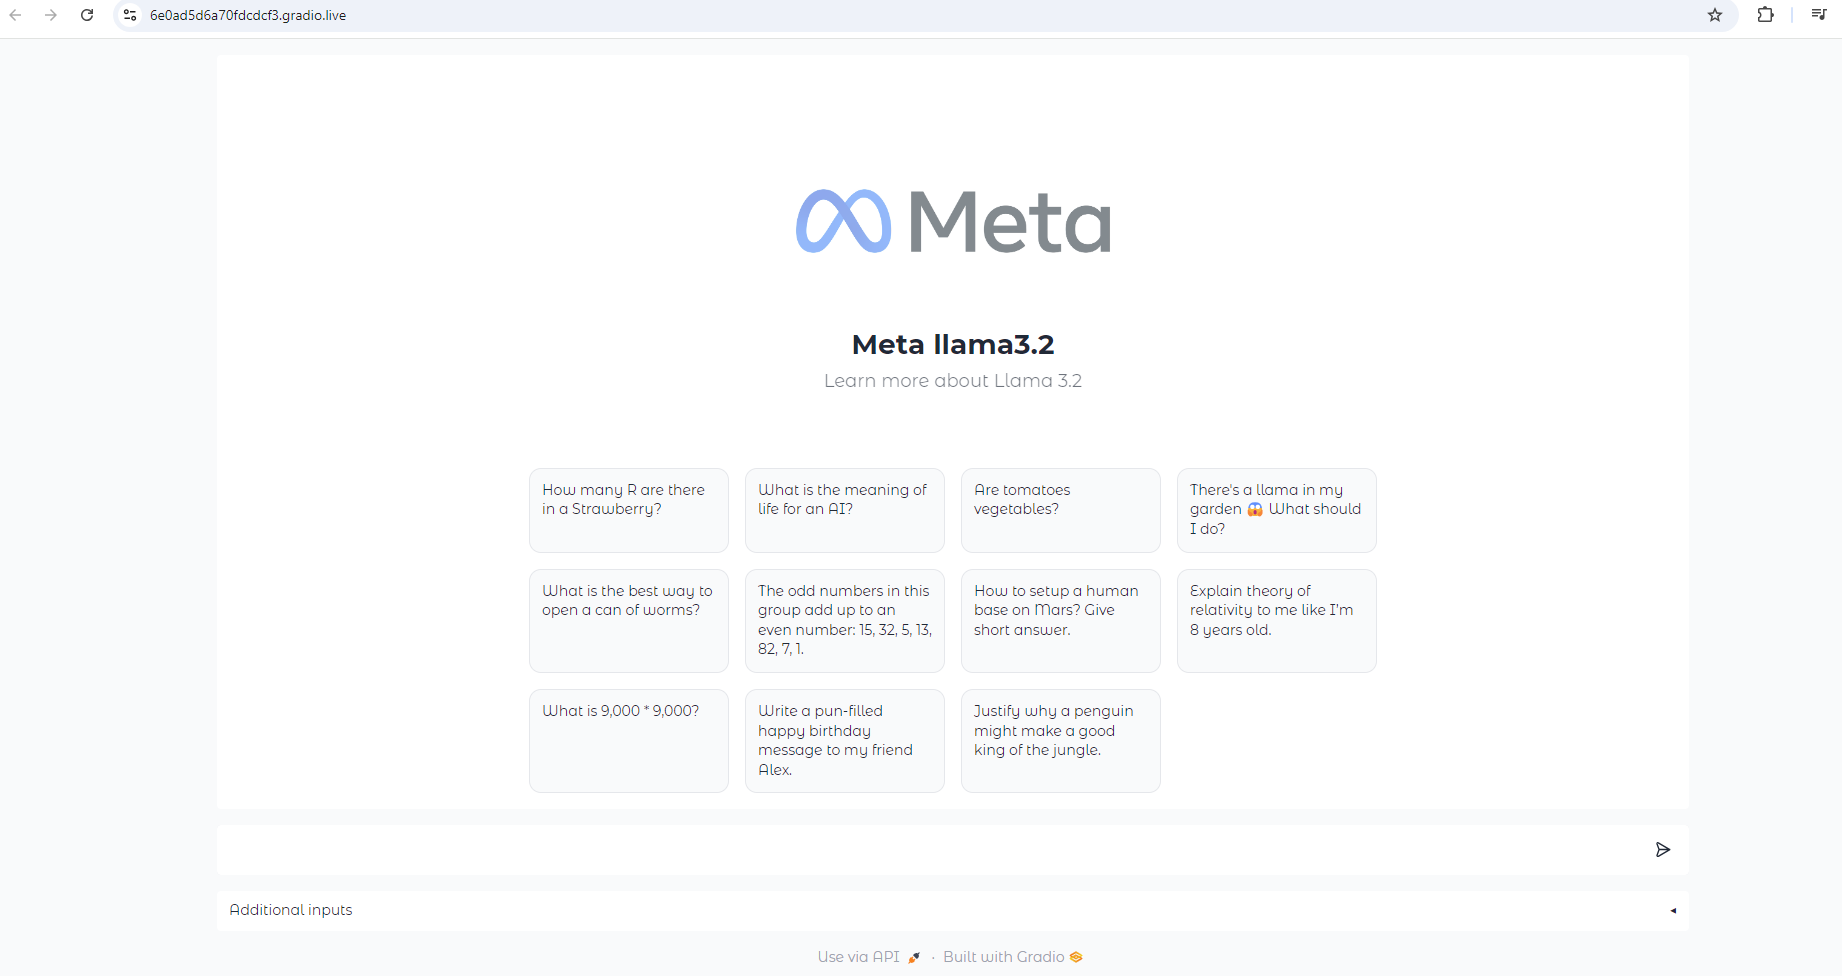

### Install Gradio 5 beta

In [ ]:
!pip install -q gradio --pre

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 MB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.2/319.2 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 60.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 9.8 MB/s eta 0:00:00


### Install required packages

In [ ]:
!pip install accelerate==0.33.0 bitsandbytes==0.43.2 transformers==4.43.3 -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 870.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.1/315.1 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.5/137.5 MB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 82.1 MB/s eta 0:00:00


### Set up your Huggingfacetoken as environ variable

In [ ]:
import os
os.environ["HF_TOKEN"] = "hf_xx"

### Download model from Huggingface Hub

In [ ]:
#llama 3.2 3b IT
import os
from threading import Thread
from typing import Iterator

import gradio as gr
#import spaces
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer, TextIteratorStreamer

DESCRIPTION = """\
# Llama 3.2 3B Instruct
Llama 3.2 3B is Meta's latest iteration of open LLMs.
This is a demo of [`meta-llama/Llama-3.2-3B-Instruct`](https://huggingface.co/meta-llama/Llama-3.2-3B-Instruct), fine-tuned for instruction following.
For more details, please check [our post](https://huggingface.co/blog/llama32).
"""

MAX_MAX_NEW_TOKENS = 2048
DEFAULT_MAX_NEW_TOKENS = 1024
MAX_INPUT_TOKEN_LENGTH = int(os.getenv("MAX_INPUT_TOKEN_LENGTH", "4096"))

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Change this to meta-llama or the correct org name from Huggingface Hub
model_id = "meta-internal/Llama-3.2-3B-Instruct"
tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForCausalLM.from_pretrained(
    model_id,
    device_map="auto",
    torch_dtype=torch.bfloat16,
)
model.eval()


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/54.5k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/296 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/878 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/20.9k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/1.46G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/189 [00:00<?, ?B/s]

LlamaForCausalLM(
  (model): LlamaModel(
    (embed_tokens): Embedding(128256, 3072)
    (layers): ModuleList(
      (0-27): 28 x LlamaDecoderLayer(
        (self_attn): LlamaSdpaAttention(
          (q_proj): Linear(in_features=3072, out_features=3072, bias=False)
          (k_proj): Linear(in_features=3072, out_features=1024, bias=False)
          (v_proj): Linear(in_features=3072, out_features=1024, bias=False)
          (o_proj): Linear(in_features=3072, out_features=3072, bias=False)
          (rotary_emb): LlamaRotaryEmbedding()
        )
        (mlp): LlamaMLP(
          (gate_proj): Linear(in_features=3072, out_features=8192, bias=False)
          (up_proj): Linear(in_features=3072, out_features=8192, bias=False)
          (down_proj): Linear(in_features=8192, out_features=3072, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): LlamaRMSNorm()
        (post_attention_layernorm): LlamaRMSNorm()
      )
    )
    (norm): LlamaRMSNorm()
    (rotary_emb): 

### Main Gradio inference function

In [ ]:
def generate(
    message: str,
    chat_history: list[tuple[str, str]],
    max_new_tokens: int = 1024,
    temperature: float = 0.6,
    top_p: float = 0.9,
    top_k: int = 50,
    repetition_penalty: float = 1.2,
) -> Iterator[str]:

    conversation = [{k: v for k, v in d.items() if k != 'metadata'} for d in chat_history]
    conversation.append({"role": "user", "content": message})

    input_ids = tokenizer.apply_chat_template(conversation, add_generation_prompt=True, return_tensors="pt")
    if input_ids.shape[1] > MAX_INPUT_TOKEN_LENGTH:
        input_ids = input_ids[:, -MAX_INPUT_TOKEN_LENGTH:]
        gr.Warning(f"Trimmed input from conversation as it was longer than {MAX_INPUT_TOKEN_LENGTH} tokens.")
    input_ids = input_ids.to(model.device)

    streamer = TextIteratorStreamer(tokenizer, timeout=20.0, skip_prompt=True, skip_special_tokens=True)
    generate_kwargs = dict(
        {"input_ids": input_ids},
        streamer=streamer,
        max_new_tokens=max_new_tokens,
        do_sample=True,
        top_p=top_p,
        top_k=top_k,
        temperature=temperature,
        num_beams=1,
        repetition_penalty=repetition_penalty,
    )
    t = Thread(target=model.generate, kwargs=generate_kwargs)
    t.start()

    conversation.append({"role": "assistant", "content": ""})
    outputs = []
    for text in streamer:
        outputs.append(text)
        bot_response = "".join(outputs)
        conversation[-1]['content'] = bot_response
        yield "", conversation


### Implementing Gradio 5 features and building a ChatInterface UI yourself

In [ ]:
PLACEHOLDER = """<div style="padding: 20px; text-align: center; display: flex; flex-direction: column; align-items: center;">
   <img src="https://ysharma-dummy-chat-app.hf.space/file=/tmp/gradio/c21ff9c8e7ecb2f7d957a72f2ef03c610ac7bbc4/Meta_lockup_positive%20primary_RGB_small.jpg" style="width: 80%; max-width: 550px; height: auto; opacity: 0.55; margin-bottom: 10px;">
   <h1 style="font-size: 28px; margin: 0;">Meta llama3.2</h1>
   <p style="font-size: 18px; margin: 5px 0 0; opacity: 0.65;">
       <a href="https://huggingface.co/blog/llama32" target="_blank" style="color: inherit; text-decoration: none;">Learn more about Llama 3.2</a>
   </p>
</div>"""


In [ ]:
import gradio as gr
import random
import time

def handle_retry(history, retry_data: gr.RetryData):
    new_history = history[:retry_data.index]
    previous_prompt = history[retry_data.index]['content']
    yield from generate(previous_prompt, chat_history = new_history, max_new_tokens = 1024, temperature = 0.6, top_p = 0.9, top_k = 50, repetition_penalty = 1.2)

def handle_like(data: gr.LikeData):
    if data.liked:
        print("You upvoted this response: ", data.value)
    else:
        print("You downvoted this response: ", data.value)

def handle_undo(history, undo_data: gr.UndoData):
    chatbot = history[:undo_data.index]
    prompt = history[undo_data.index]['content']
    return chatbot, prompt

def chat_examples_fill(data: gr.SelectData):
    yield from generate(data.value['text'], chat_history = [], max_new_tokens = 1024, temperature = 0.6, top_p = 0.9, top_k = 50, repetition_penalty = 1.2)


with gr.Blocks(theme=gr.themes.Soft(), fill_height=True) as demo:
    with gr.Column(elem_id="container", scale=1):
        chatbot = gr.Chatbot(
            label="Llama3.2 3B Instruct Chatbotw using Gradio 5",
            show_label=False,
            type="messages",
            scale=1,
            suggestions = [
                {"text": "How many R are there in a Strawberry?"},
                {"text": "What is the meaning of life for an AI?"},
                {"text": "Are tomatoes vegetables?"},
                {"text": "There's a llama in my garden 😱 What should I do?"},
                {"text": "What is the best way to open a can of worms?"},
                {"text": "The odd numbers in this group add up to an even number: 15, 32, 5, 13, 82, 7, 1. "},
                {"text": 'How to setup a human base on Mars? Give short answer.'},
                {"text": 'Explain theory of relativity to me like I’m 8 years old.'},
                {"text": 'What is 9,000 * 9,000?'},
                {"text": 'Write a pun-filled happy birthday message to my friend Alex.'},
                {"text": 'Justify why a penguin might make a good king of the jungle.'}
                ],
            placeholder = PLACEHOLDER,
            )

    msg = gr.Textbox(submit_btn=True, show_label=False)
    with gr.Accordion('Additional inputs', open=False):
        max_new_tokens = gr.Slider(label="Max new tokens", minimum=1, maximum=10, step=1, value=23, )
        temperature = gr.Slider(label="Temperature",minimum=0.1, maximum=4.0, step=0.1, value=0.6,)
        top_p = gr.Slider(label="Top-p (nucleus sampling)", minimum=0.05, maximum=1.0, step=0.05, value=0.9, )
        top_k = gr.Slider(label="Top-k", minimum=1, maximum=1000, step=1, value=50, )
        repetition_penalty = gr.Slider(label="Repetition penalty", minimum=1.0, maximum=2.0, step=0.05, value=1.2, )

    msg.submit(generate, [msg, chatbot, max_new_tokens, temperature, top_p, top_k, repetition_penalty], [msg, chatbot])
    chatbot.retry(handle_retry, chatbot, [msg, chatbot])
    chatbot.like(handle_like, None, None)
    chatbot.undo(handle_undo, chatbot, [chatbot, msg])
    chatbot.suggestion_select(chat_examples_fill, None, [msg, chatbot] )


demo.launch(debug=False)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://6e0ad5d6a70fdcdcf3.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
